# **Project Name**    - HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member       -** Afsal M

# **Project Summary -**

The primary goal of this project is to develop a predictive model that can identify potential customers who are likely to purchase additional health insurance products, based on their existing data. By leveraging customer demographic information, insurance product usage history, and other behavioral factors, the model will enable insurance companies to cross-sell relevant health insurance products to existing customers.

# **GitHub Link -**



# <b><u> Project Title : Predicting whether a customer will take cross health insurance </u></b>

## <b> Problem Description </b>

The primary goal of this project is to develop a predictive model that can identify potential customers who are likely to purchase additional health insurance products, based on their existing data. By leveraging customer demographic information, insurance product usage history, and other behavioral factors, the model will enable insurance companies to cross-sell relevant health insurance products to existing customers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

*   ID : A unique identifier for each individual or record in the dataset. It helps to differentiate one entry from another, ensuring that each row corresponds to a specific policyholder or transaction.

*   Gender : The gender of the policyholder. It is usually represented as categorical data (e.g., "0 for Male", "1 for Female").

* Age : The age of the policyholder. This could be the person's actual age in years.

* Driving_License : This likely indicates whether the individual holds a valid driving license. The values are typically binary ("1"/"0").

* Region_Code : A code representing the region or geographic area where the policyholder resides. This can help insurers segment the data based on regions for pricing, risk analysis, or market targeting.

* Previously_Insured : Indicates whether the person had insurance coverage before. It could be a binary field (e.g.,  "1"/"0"). This helps insurers assess the customer's experience with insurance.

* Vehicle_Age : Refers to the age of the vehicle being insured. It could be expressed as the number of years since the vehicle was manufactured (e.g., < 1 Year': 0 , '1-2 Year': 1,  '> 2 Years': 2).

* Vehicle_Damage : This indicates whether the vehicle has any history of damage, usually before the policyholder's purchase of the insurance.

* Annual_Premium : The total amount the policyholder will pay for the insurance annually. This is a numerical field representing the premium amount (in the local currency).

* Policy_Sales_Channel: This likely refers to the method or channel through which the insurance policy was sold.

* Vintage : This is usually the number of days a customer has been associated with the insurance company or how long they've had the insurance policy. It helps to indicate the duration of the customer relationship.

* Response : This is typically the target variable in insurance datasets. It usually indicates whether the policyholder responded to an offer or whether they bought insurance. It might be binary.

##**Import the dependancy**

In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

In [ ]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Data science/Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


* **We can see that the data type of Gender, Vehicle_Age, Vehicle_Damage are object data types.**
* **So we need to convert it into corresponding type**

**Convert all Object type to int**

In [ ]:
df.shape

(381109, 12)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.459239,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.Response.value_counts()

,count
Response,
0,334399
1,46710


In [ ]:
df.Response.value_counts(normalize=True)

,proportion
Response,
0,0.877437
1,0.122563


* So, we have **87.74%** data as **Response Failure** and **12.25%** data as **Response Success**.
* So, our data is highly **Imbalanced**.

## **Data Cleaning**

### **Checking the missing values**

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


* So our data have **no null values.**

In [ ]:
duplicate = df['id'].duplicated()

print("Total Duplicate Values is :", duplicate.sum())

Total Duplicate Values is : 0


### **Identify outliers**

In [ ]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.459239,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
columns = ['Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [ ]:
# let's create a function to check the outliers
def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [ ]:
check_outliers(columns,df)

Output hidden; open in https://colab.research.google.com to view.

* There is no Outlier

### **Let's do some analysis on columns**

In [ ]:
# Create a function for ploting the graph for has deff or not
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['Response'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "0"
    list2_name = "1"
    title = f"Response by {column_name}"
    xlabel = column_name
    ylabel = "Response percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

In [ ]:
df.Gender.value_counts()

,count
Gender,
0,206089
1,175020


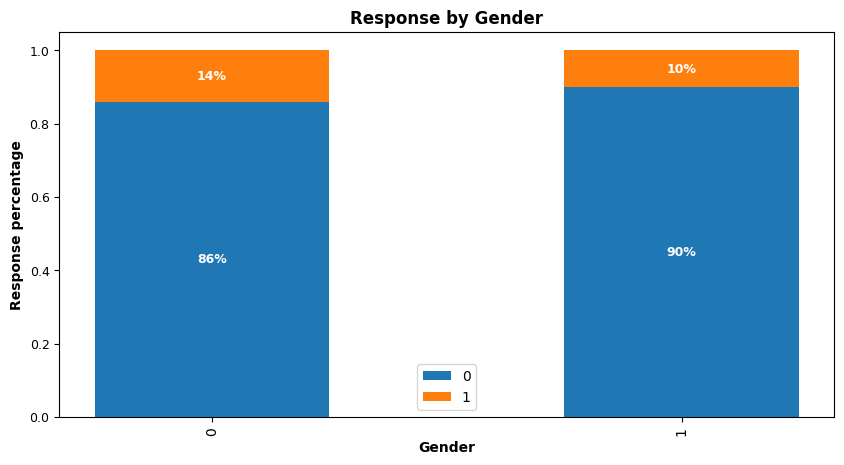

In [ ]:
create_stacked_bar('Gender')

1. 14% male have response while 10% female have response.

2. Also we can observe that for male the response is more.

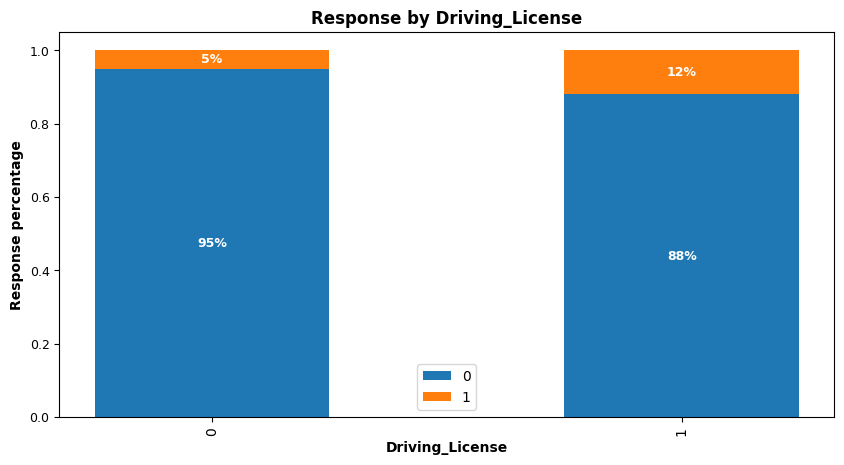

In [ ]:
create_stacked_bar('Driving_License')

1. Response rate is more for the one having driving license.

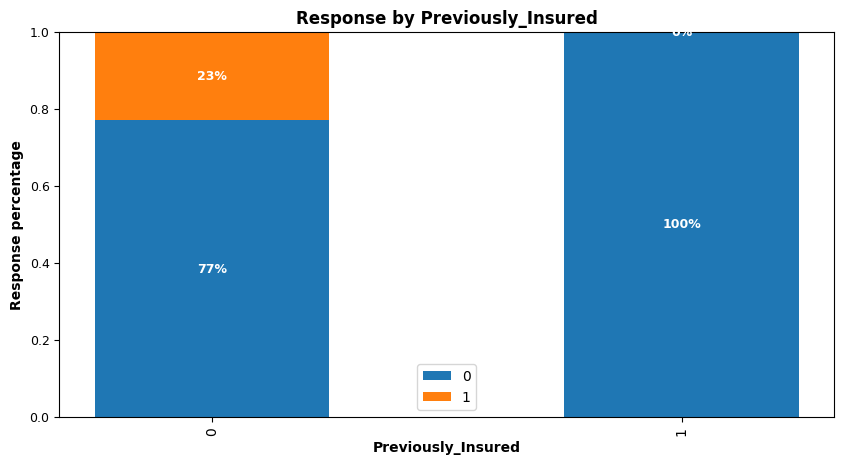

In [ ]:
create_stacked_bar('Previously_Insured')

1. Response from those who have not previously insured is more.

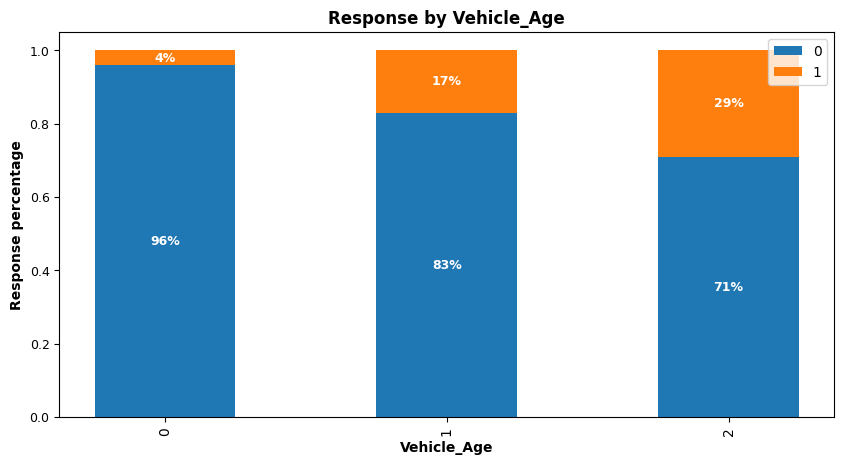

In [ ]:
create_stacked_bar('Vehicle_Age')

1. Here the chance of geting response is more when the vehicle age increases.

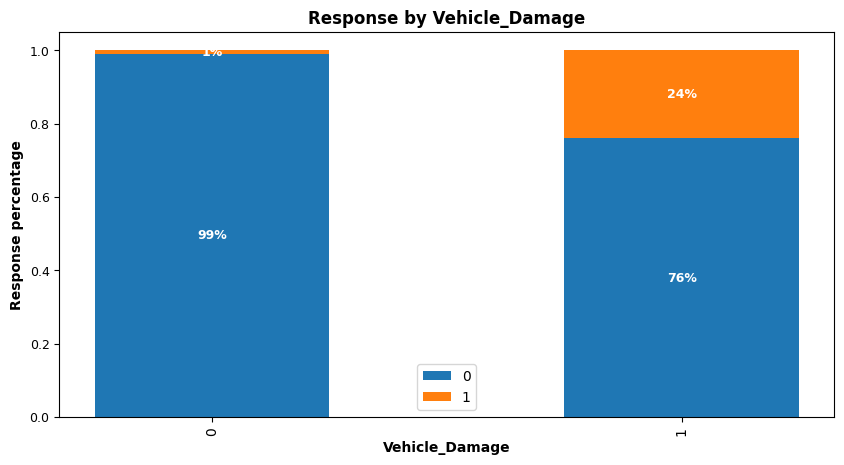

In [ ]:
create_stacked_bar('Vehicle_Damage')

1. Response is good from those having damage.

## **EDA Conclusion**

* There are no **duplicate** IDs or rows.

* 14% male have response while 10% female have response.

* Also we can observe that for male the response is more.

* Response rate is more for the one having driving license.

* Response from those who have not previously insured is more.

* The chance of geting response is more when the vehicle age increases.

* Response is good from those having damage.



### **Pairplots**

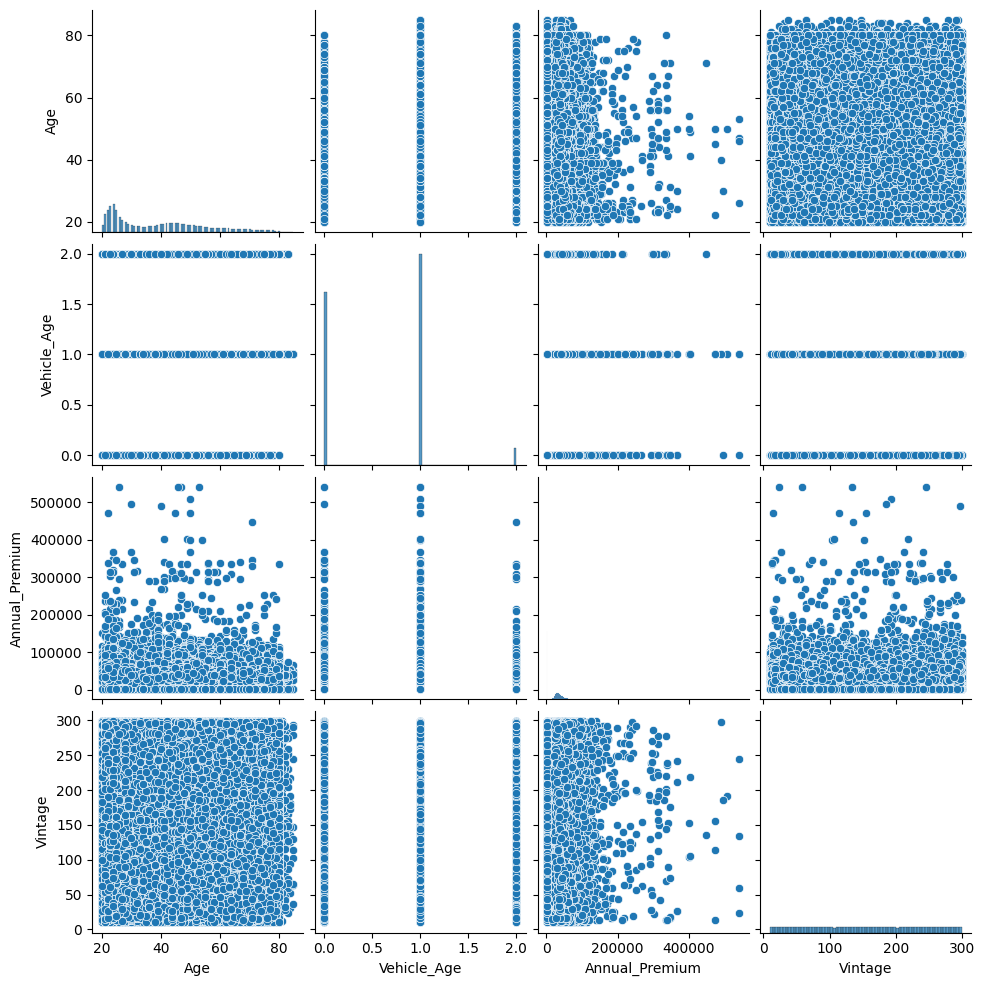

In [ ]:
sns.pairplot(df[['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage']])
plt.show()


### **Adding Target Variable ('Response') to Pair Plot**

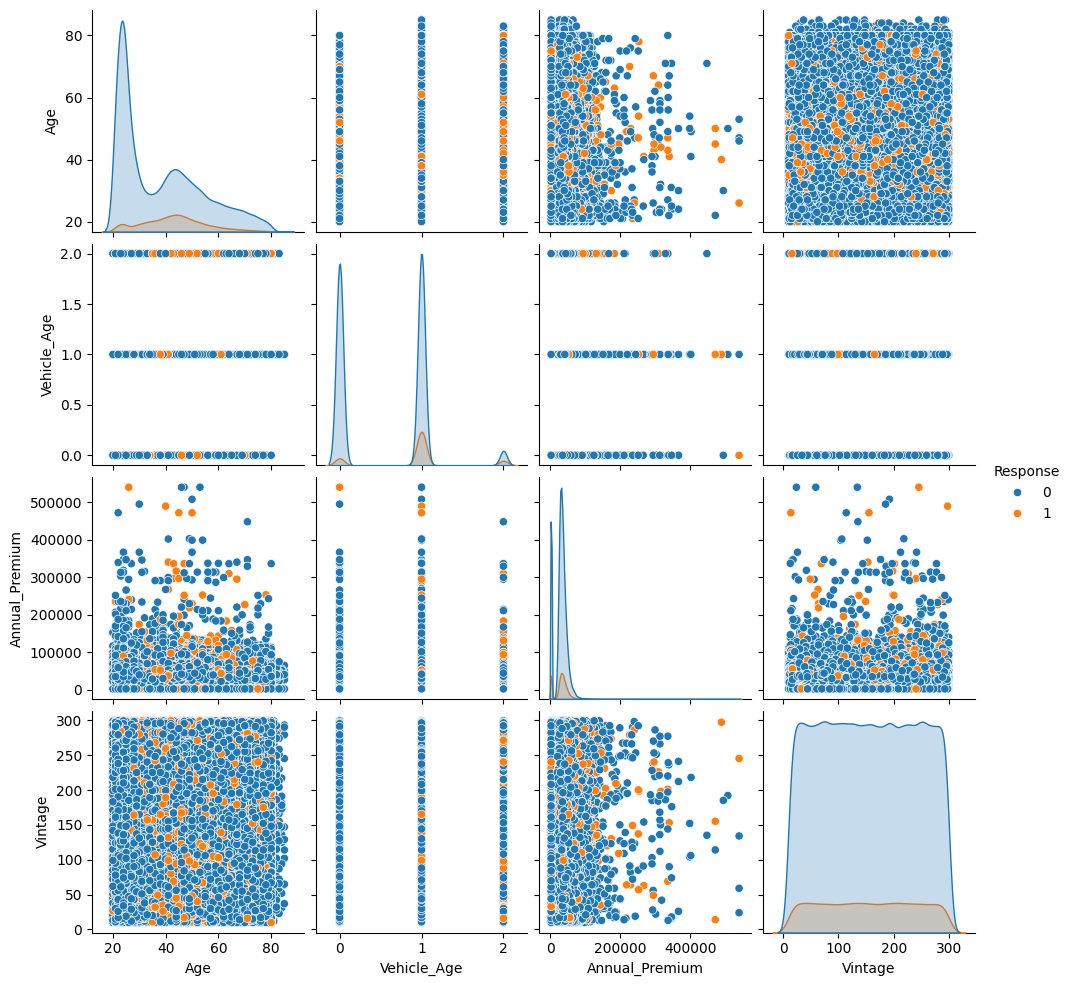

In [ ]:
sns.pairplot(df[['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage', 'Response']], hue='Response')
plt.show()

### **Correlation Matrix**

In [ ]:
numerical_columns = ['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage']

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

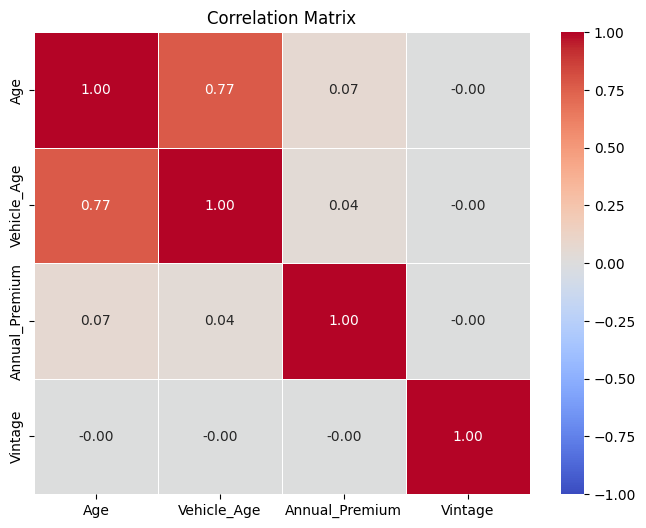

In [ ]:
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

<Axes: >

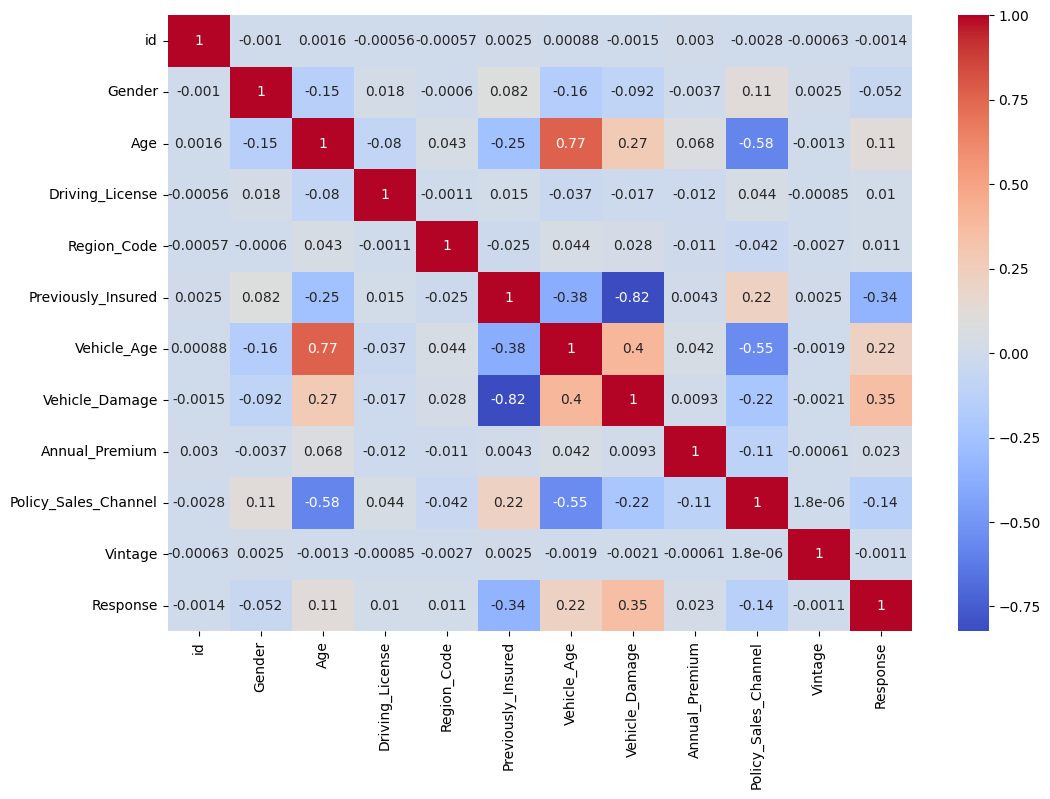

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## **Prepare for Modeling**

### **Feature Engineering**

In [ ]:
df['Driving_License'] = df['Driving_License'].map({0: 0, 1: 1})
df['Previously_Insured'] = df['Previously_Insured'].map({0: 0, 1: 1})
df['Response'] = df['Response'].map({0: 0, 1: 1})

### **Feature Selection**

In [ ]:
X = df.drop(columns=['Response','id'])
y = df['Response']


### **Check Class Imbalance**

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


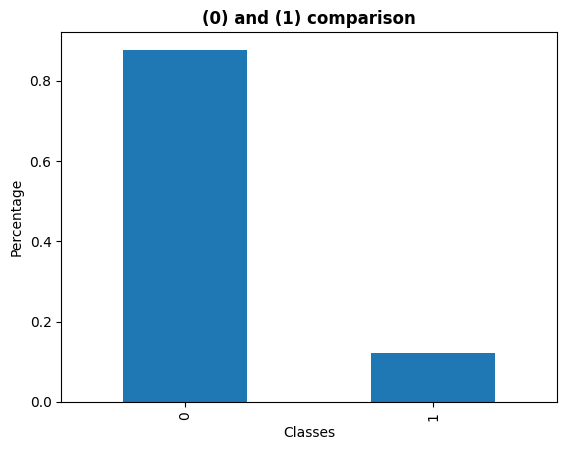

In [ ]:
cla_bal = df['Response'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('(0) and (1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()



* This dataset is also imbalanced, with 87% 0 vs 13% 1.

### **Split Training and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(266776, 10)
Shape of y_train:(266776,)
Shape of X_test:(114333, 10)
Shape of y_test:(114333,)


**Oversampling**

In [ ]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: Response
0    234158
1     32618
Name: count, dtype: int64

Dataset After: Response
1    234158
0    234158
Name: count, dtype: int64


## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Best score
logistic_grid_model.best_score_

0.7392907036060591

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.7716862118740337
Testing accuracy: 0.6779145128702999


Precision score of logistic model: 0.2532829762757483
 
Recall score of logistic model: 0.8280584728924212
 
F1 score of logistic model:  0.387912836793378
 
ROC AUC score of logistic model:  0.7424327838968545
 
Confusion matrix of logistic model 
: [[65839 34402]
 [ 2423 11669]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

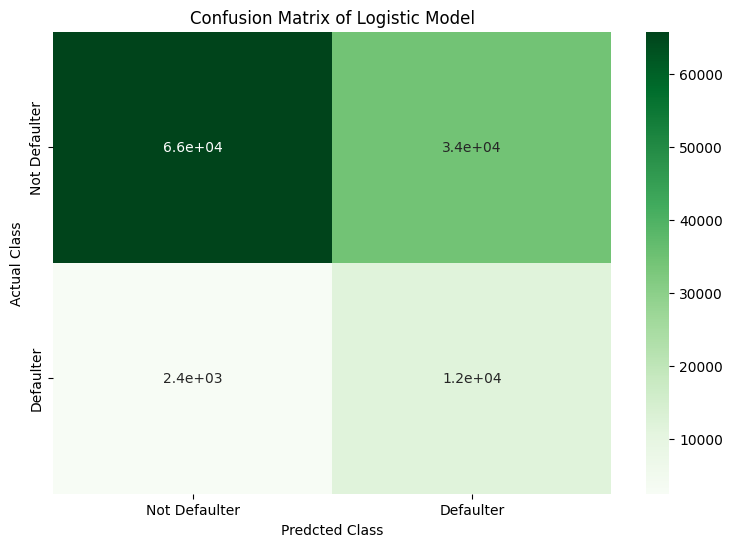

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

### **RANDOM FOREST**

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [ ]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 0.9998249045516275
Testing Accuracy of Random Forest: 0.8172793506686609


Precision score of RANDOM FOREST model: 0.31983676930414967
 
Recall score of RANDOM FOREST model: 0.4282571671870565
 
F1 score of RANDOM FOREST model:  0.36619034616668183
 
ROC AUC score of RANDOM FOREST model:  0.6501128614838126
 
Confusion matrix of RANDOM FOREST 
: [[87407 12834]
 [ 8057  6035]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

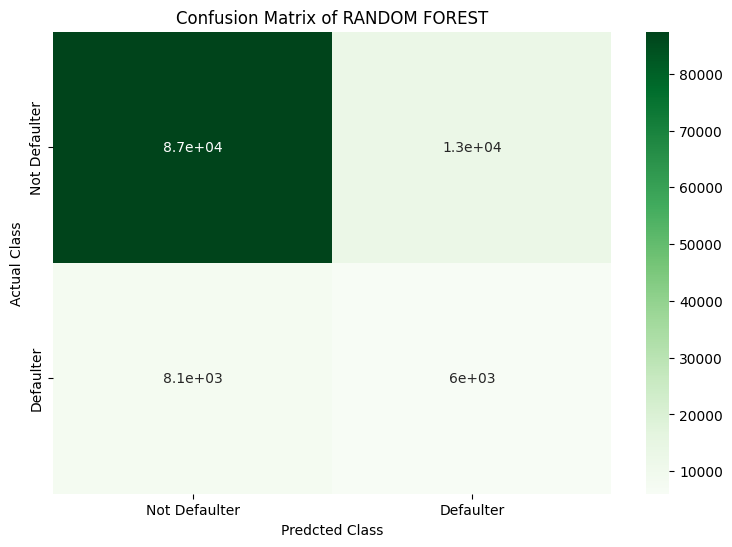

In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

**Random Forest Using hyperparameter tuning**

In [ ]:
params_grid = {'n_estimators' : [100,150,200],'max_depth' : [10,20,30]}

In [ ]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.873239548441294
{'max_depth': 30, 'n_estimators': 200}


In [ ]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  0.9695376626038829
The accuracy on test data is  0.8065650337172995


Precision score of RANDOM FOREST: 0.3196529713206869
 
Recall score of RANDOM FOREST: 0.5046125461254612
 
F1 score of RANDOM FOREST:  0.39138092355110354
 
ROC AUC score of RANDOM FOREST:  0.6768132113414788
 
Confusion matrix of RANDOM FOREST model 
: [[85106 15135]
 [ 6981  7111]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

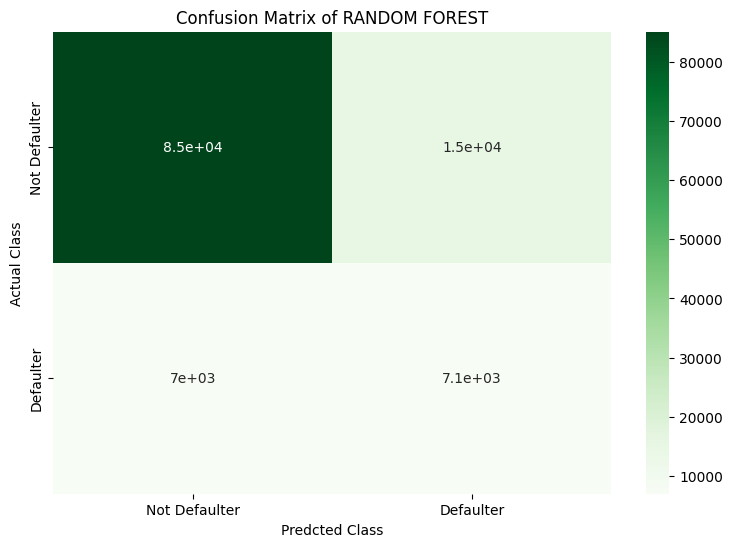

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
ref_test_precision = precision_score(y_test,y_test_grid_rf_pred)

  # recall,
ref_test_recall = recall_score(y_test,y_test_grid_rf_pred,)

  # f1 score
ref_f1_score = f1_score(y_test,y_test_grid_rf_pred)

  # roc_auc_score
ref_roc_auc_score = roc_auc_score(y_test,y_test_grid_rf_pred)

  # confusion matrix
ref_confusion_mat = confusion_matrix(y_test,y_test_grid_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST:',ref_test_precision)
print(' ')
print('Recall score of RANDOM FOREST:', ref_test_recall)
print(' ')
print('F1 score of RANDOM FOREST: ', ref_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST: ',ref_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST model \n:',ref_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(ref_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

### **Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [ ]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.7982836375438807
Testing accuracy of decision tree classifier: 0.6626958096087744


Precision score of Decision Tree model: 0.25625958608051314
 
Recall score of Decision Tree model: 0.9129293216009083
 
F1 score of Decision Tree model:  0.40018663970759777
 
ROC AUC score of Decision Tree model:  0.7702235019931798
 
Confusion matrix of Decision Tree model 
: [[62903 37338]
 [ 1227 12865]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

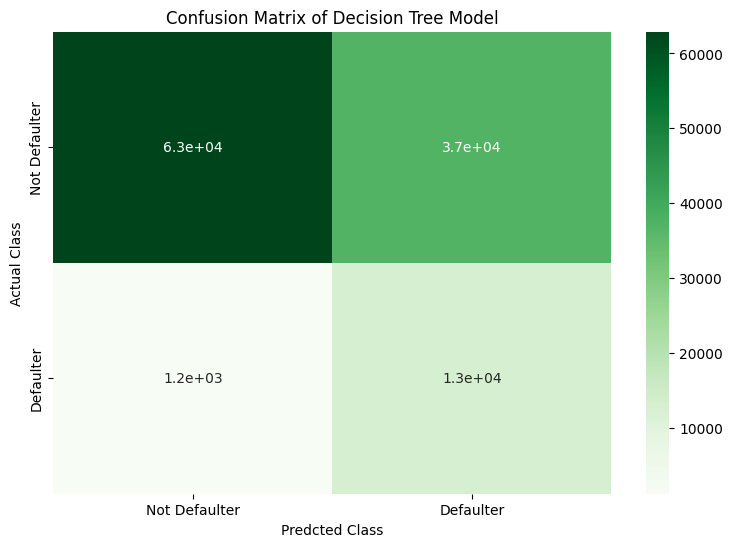

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

### **XGBoost**

In [ ]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.8750843447586673
Testing Accuracy of XGBClassifier: 0.8052880620643209


Precision score of XGBoost model: 0.32351162187851035
 
Recall score of XGBoost model: 0.5313653136531366
 
F1 score of XGBoost model:  0.40216982652129546
 
ROC AUC score of XGBoost model:  0.6875808821036504
 
Confusion matrix of XGBoost model 
: [[84583 15658]
 [ 6604  7488]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

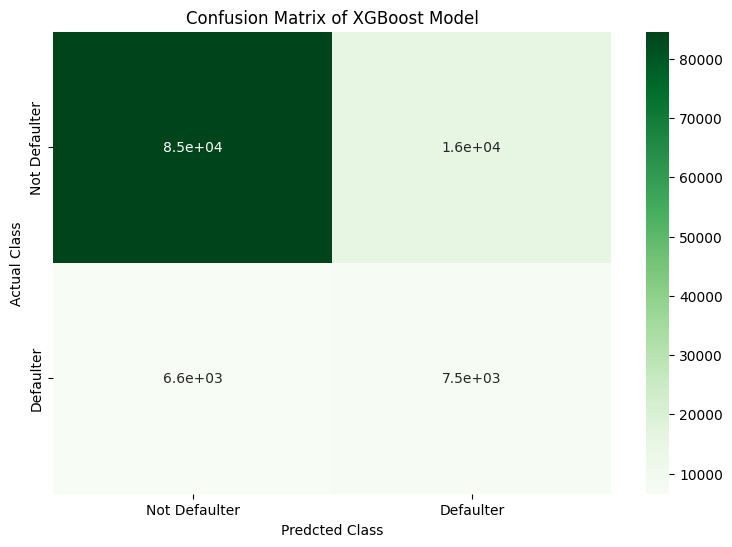

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

## **EVALUATION MATRIX**

In [ ]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Random Forest tuning','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,dtc_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,dtc_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, rf_test_precision, ref_test_precision,dt_test_precision, xg_test_precision]
recall_score = [log_test_recall, rf_test_recall, ref_test_recall,dt_test_recall,xg_test_recall]
f1_score = [log_f1_score, rf_f1_score, ref_f1_score,dt_f1_score, xg_f1_score]
roc_auc_score = [log_roc_auc_score, rf_roc_auc_score, ref_roc_auc_score,dt_roc_auc_score, xg_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.771686,0.677915,0.253283,0.828058,0.387913,0.742433
1,Random Forest,0.999825,0.817279,0.319837,0.428257,0.366190,0.650113
2,Random Forest tuning,0.969538,0.806565,0.319653,0.504613,0.391381,0.676813
3,Decision Tree Classifier,0.798284,0.662696,0.256260,0.912929,0.400187,0.770224
4,XGBoost Classifier,0.875084,0.805288,0.323512,0.531365,0.402170,0.687581


From above we can see Random forest with hyper tuning gives the best accuracy.

## **MODEL EXPLAINABILITY**

In [ ]:
# Install shap
!pip install shap

In [ ]:
# Import dependancy
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

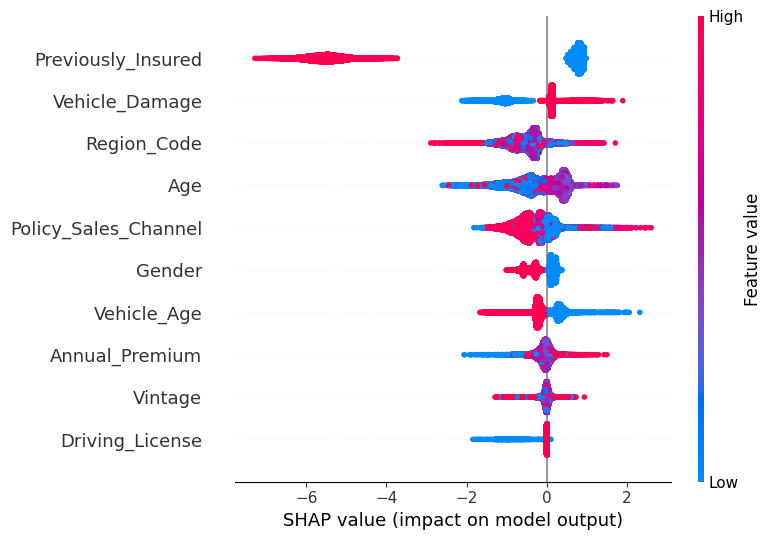

In [ ]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

# **Conclusion:-**


### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* This dataset is also **imbalanced**, with **87.7%** as 0 vs **12.2%** as 1.

* We use **SMOTE** because the class is highlly **Imbalance**


---




### **MODELS - 1**

* Using a **Logistic Regression** classifier, we can predict with **77.16%** accuracy in Train data and **67.7%** in Test data.

* Using **Decision Tree** classifier, we can predict with **79.8%** accuracy in Train data and **66.2%** in Test data.

* Using **Random Fores**t, we can predict with **99.9%** accuracy in Train data and **81.7%** in Test data.

* By applying **XGBoost Classifier** with recall **87.5%**, we can predict with 81.60% accuracy in Train data and **80.5%** in Test data.




---


### **Model Explaination**

* 'Vehicle Age' is the most important features.


